In [1]:
import pandas as pd
# from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import re
import string
import csv

In [2]:

from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer



In [3]:
air_data= pd.read_csv('Tweets.csv')

In [4]:
air_data.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [5]:
air_missing=air_data[air_data.negativereason.isnull()]

In [6]:
air_missing.shape


(5462, 15)

In [7]:
air_data[air_data.airline_sentiment_confidence.isnull()]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone


In [8]:
air_data.groupby('airline').count()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
airline,,,,,,,,,,,,,,
American,2759,2759,2759,1960,2190,14,2759,11,2759,2759,183,2759,1848,1791
Delta,2222,2222,2222,955,1184,7,2222,7,2222,2222,160,2222,1604,1613
Southwest,2420,2420,2420,1186,1445,8,2420,5,2420,2420,160,2420,1596,1659
US Airways,2913,2913,2913,2263,2470,3,2913,2,2913,2913,150,2913,1844,1851
United,3822,3822,3822,2633,3000,8,3822,7,3822,3822,319,3822,2633,2527
Virgin America,504,504,504,181,233,0,504,0,504,504,47,504,382,379


In [9]:
air_data[air_data.negativereason.isnull()].count()

tweet_id                        5462
airline_sentiment               5462
airline_sentiment_confidence    5462
negativereason                     0
negativereason_confidence       1344
airline                         5462
airline_sentiment_gold             8
name                            5462
negativereason_gold                0
retweet_count                   5462
text                            5462
tweet_coord                      356
tweet_created                   5462
tweet_location                  3871
user_timezone                   3812
dtype: int64

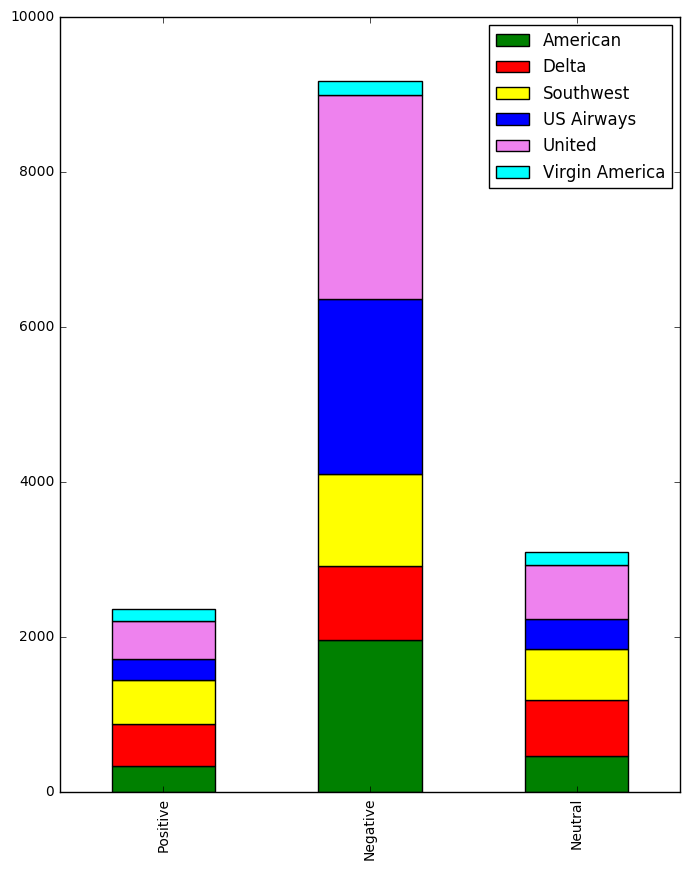

In [10]:
air_positive = air_data[air_data['airline_sentiment']=='positive']['airline'].value_counts()
air_negative = air_data[air_data['airline_sentiment']=='negative']['airline'].value_counts()
air_neutral = air_data[air_data['airline_sentiment']=='neutral']['airline'].value_counts()
df = pd.DataFrame([air_positive,air_negative,air_neutral])
df.index = ['Positive','Negative','Neutral']
df.plot(kind='bar',stacked=True, figsize=(8,10),color = ['green','red','yellow','blue','violet','cyan'])


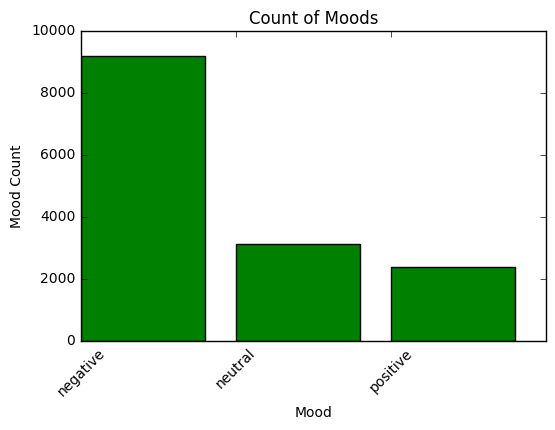

In [11]:
Mood_count=air_data['airline_sentiment'].value_counts()
Index = [1,2,3]
plt.bar(Index,Mood_count,color = ['green'])
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

In [12]:
air_data.head(5)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [13]:
air_data['airline_sentiment']=air_data.airline_sentiment.map({'negative':0,'neutral':1,'positive':2})

In [14]:
air_data.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,1,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,2,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,1,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [15]:
air_data_modified=air_data

In [16]:
air_data_modified.drop('tweet_id',1,inplace=True)

In [17]:
air_data_modified.drop('negativereason',1,inplace=True)

In [18]:
air_data_modified.drop('negativereason_confidence',1,inplace=True)

In [19]:
air_data_modified.drop('airline_sentiment_gold',1,inplace=True)

In [20]:
air_data_modified.drop('name',1,inplace=True)

In [21]:
air_data_modified.drop('negativereason_gold',1,inplace=True)

In [22]:
air_data_modified.drop('retweet_count',1,inplace=True)

In [23]:
air_data_modified.drop('tweet_coord',1,inplace=True)

In [24]:
air_data_modified.drop('tweet_created',1,inplace=True)

In [25]:
air_data_modified.drop('user_timezone',1,inplace=True)

In [26]:
air_data_modified.drop('tweet_location',1,inplace=True)

In [27]:
# air_data_modified= air_data_modified[air_data_modified['text'].str.startswith('@') == True]

In [28]:
air_data=air_data_modified

In [29]:
air_data.head(10)


,airline_sentiment,airline_sentiment_confidence,airline,text
0,1,1.0000,Virgin America,@VirginAmerica What @dhepburn said.
1,2,0.3486,Virgin America,@VirginAmerica plus you've added commercials t...
2,1,0.6837,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,0,1.0000,Virgin America,@VirginAmerica it's really aggressive to blast...
4,0,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...
5,0,1.0000,Virgin America,@VirginAmerica seriously would pay $30 a fligh...
6,2,0.6745,Virgin America,"@VirginAmerica yes, nearly every time I fly VX..."
7,1,0.6340,Virgin America,@VirginAmerica Really missed a prime opportuni...
8,2,0.6559,Virgin America,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,2,1.0000,Virgin America,"@VirginAmerica it was amazing, and arrived an ..."


In [30]:
air_data.shape

(14640, 4)

In [31]:
air_data['text'].head(10)

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
5    @VirginAmerica seriously would pay $30 a fligh...
6    @VirginAmerica yes, nearly every time I fly VX...
7    @VirginAmerica Really missed a prime opportuni...
8      @virginamerica Well, I didn't…but NOW I DO! :-D
9    @VirginAmerica it was amazing, and arrived an ...
Name: text, dtype: object

In [32]:
air_data.head()

,airline_sentiment,airline_sentiment_confidence,airline,text
0,1,1.0000,Virgin America,@VirginAmerica What @dhepburn said.
1,2,0.3486,Virgin America,@VirginAmerica plus you've added commercials t...
2,1,0.6837,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,0,1.0000,Virgin America,@VirginAmerica it's really aggressive to blast...
4,0,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...


In [33]:
 air_data.tail()

,airline_sentiment,airline_sentiment_confidence,airline,text
14635,2,0.3487,American,@AmericanAir thank you we got on a different f...
14636,0,1.0000,American,@AmericanAir leaving over 20 minutes Late Flig...
14637,1,1.0000,American,@AmericanAir Please bring American Airlines to...
14638,0,1.0000,American,"@AmericanAir you have my money, you change my ..."
14639,1,0.6771,American,@AmericanAir we have 8 ppl so we need 2 know h...


In [34]:
# s={'ourselves','&lt;3','&gt;' ,'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than'}


In [35]:
# air_data['cleansed_data']

In [36]:
air_data.head()

,airline_sentiment,airline_sentiment_confidence,airline,text
0,1,1.0000,Virgin America,@VirginAmerica What @dhepburn said.
1,2,0.3486,Virgin America,@VirginAmerica plus you've added commercials t...
2,1,0.6837,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,0,1.0000,Virgin America,@VirginAmerica it's really aggressive to blast...
4,0,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...


In [37]:
# air_data['cleansed_data'].to_csv('result.csv',index=False)

In [38]:

def clean_data(input):
#     return [i for i in input.lower().split() if i not in s]
    arrays=[] 
    for processed in input.split():
        processed=processed.rstrip()
        processed=processed.replace('\"',"")
        processed=processed.replace('\'',"")
        processed=processed.replace('\.',"") 
        #     processed=processed.rstrip() 
        processed=processed.replace('\#',"") 
        processed=processed.replace('\;',"")
        processed=processed.replace('\:',"")
        processed=re.sub('@[^\s]+','',processed)
        processed=re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',processed)
        arrays.append(processed)
    return ' '.join(arrays)
# print [y for x in y if y not in list(s)]
# arrays = pd.DataFrame(arrays)
# arrays = 
air_data['text_processed'] = air_data['text'].apply(lambda x: clean_data(x))
air_data.head(100)

,airline_sentiment,airline_sentiment_confidence,airline,text,text_processed
0,1,1.0000,Virgin America,@VirginAmerica What @dhepburn said.,What said.
1,2,0.3486,Virgin America,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experienc...
2,1,0.6837,Virgin America,@VirginAmerica I didn't today... Must mean I n...,I didnt today... Must mean I need to take ano...
3,0,1.0000,Virgin America,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious ente...
4,0,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it
5,0,1.0000,Virgin America,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay $30 a flight for seats th...
6,2,0.6745,Virgin America,"@VirginAmerica yes, nearly every time I fly VX...","yes, nearly every time I fly VX this “ear wor..."
7,1,0.6340,Virgin America,@VirginAmerica Really missed a prime opportuni...,Really missed a prime opportunity for Men Wit...
8,2,0.6559,Virgin America,"@virginamerica Well, I didn't…but NOW I DO! :-D","Well, I didnt…but NOW I DO! :-D"
9,2,1.0000,Virgin America,"@VirginAmerica it was amazing, and arrived an ...","it was amazing, and arrived an hour early. Yo..."


In [39]:
air_data.tail(100)

,airline_sentiment,airline_sentiment_confidence,airline,text,text_processed
14540,0,1.0000,American,@AmericanAir tried ringing but told me to try ...,tried ringing but told me to try again Late F...
14541,2,1.0000,American,@AmericanAir You guys did an amazing job today...,You guys did an amazing job today! Know it’s ...
14542,0,1.0000,American,.@AmericanAir cover a rental car or refund our...,. cover a rental car or refund our ticket? - I...
14543,0,1.0000,American,@AmericanAir should reconsider #usairways acqu...,should reconsider #usairways acquisition. Fli...
14544,0,1.0000,American,@AmericanAir You neglected to mention the $2...,You neglected to mention the $200 fee per tic...
14545,1,1.0000,American,@AmericanAir yes and I would like a refund.,yes and I would like a refund.
14546,1,1.0000,American,@AmericanAir how realistic is it to make an 80...,how realistic is it to make an 80 minute dome...
14547,2,1.0000,American,Eliza &amp; I cheated on u @AmericanAir with @...,Eliza &amp; I cheated on u with &amp; it was...
14548,2,0.6868,American,@AmericanAir I hope you like the photo :) http...,I hope you like the photo :)
14549,0,1.0000,American,"@AmericanAir @sweetmel If weather is bad, woul...","If weather is bad, wouldnt your folks try ex..."


In [40]:
#get rid of the common words 
s={'ourselves','&lt;3','&gt;',':-D' ,'hers', 'between','you','yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than'}

# arrays=[]
def remove_stopwords(input):
#     return [i for i in input.lower().split() if i not in s]
    new_arrays=[] 
    for i in input.split():
        if i not in s:
            new_arrays.append(i)
        
    return ' '.join(new_arrays)
            
# print [y for x in y if y not in list(s)]
# arrays = pd.DataFrame(arrays)
# arrays = 
air_data['cleansed_data'] = air_data['text_processed'].apply(lambda x: remove_stopwords(x))
air_data.head(10)

,airline_sentiment,airline_sentiment_confidence,airline,text,text_processed,cleansed_data
0,1,1.0000,Virgin America,@VirginAmerica What @dhepburn said.,What said.,What said.
1,2,0.3486,Virgin America,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experienc...,plus youve added commercials experience... tacky.
2,1,0.6837,Virgin America,@VirginAmerica I didn't today... Must mean I n...,I didnt today... Must mean I need to take ano...,I didnt today... Must mean I need take another...
3,0,1.0000,Virgin America,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious ente...,really aggressive blast obnoxious entertainmen...
4,0,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it,really big bad thing
5,0,1.0000,Virgin America,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay $30 a flight for seats th...,seriously would pay $30 flight seats didnt pla...
6,2,0.6745,Virgin America,"@VirginAmerica yes, nearly every time I fly VX...","yes, nearly every time I fly VX this “ear wor...","yes, nearly every time I fly VX “ear worm” won..."
7,1,0.6340,Virgin America,@VirginAmerica Really missed a prime opportuni...,Really missed a prime opportunity for Men Wit...,Really missed prime opportunity Men Without Ha...
8,2,0.6559,Virgin America,"@virginamerica Well, I didn't…but NOW I DO! :-D","Well, I didnt…but NOW I DO! :-D","Well, I didnt…but NOW I DO!"
9,2,1.0000,Virgin America,"@VirginAmerica it was amazing, and arrived an ...","it was amazing, and arrived an hour early. Yo...","amazing, arrived hour early. Youre good me."


In [41]:
air_data.tail()

,airline_sentiment,airline_sentiment_confidence,airline,text,text_processed,cleansed_data
14635,2,0.3487,American,@AmericanAir thank you we got on a different f...,thank you we got on a different flight to Chi...,thank got different flight Chicago.
14636,0,1.0000,American,@AmericanAir leaving over 20 minutes Late Flig...,leaving over 20 minutes Late Flight. No warni...,leaving 20 minutes Late Flight. No warnings co...
14637,1,1.0000,American,@AmericanAir Please bring American Airlines to...,Please bring American Airlines to #BlackBerry10,Please bring American Airlines #BlackBerry10
14638,0,1.0000,American,"@AmericanAir you have my money, you change my ...","you have my money, you change my flight, and ...","money, change flight, dont answer phones! Any ..."
14639,1,0.6771,American,@AmericanAir we have 8 ppl so we need 2 know h...,we have 8 ppl so we need 2 know how many seat...,8 ppl need 2 know many seats next flight. Plz ...


In [42]:
# air_data['after_text_processed']=df

In [43]:
# air_data.head()

In [44]:
air_data.tail(14155)

,airline_sentiment,airline_sentiment_confidence,airline,text,text_processed,cleansed_data
485,0,1.0000,Virgin America,@VirginAmerica As one of the travelers affecte...,As one of the travelers affected by the Bosto...,"As one travelers affected Boston storm, Im sho..."
486,0,0.6579,Virgin America,@VirginAmerica Umm so no reason as to why this...,Umm so no reason as to why this is? Is there ...,Umm reason is? Is someone different I contact ...
487,0,0.6515,Virgin America,@virginamerica Trying to make the change in ad...,Trying to make the change in advance (not jus...,Trying make change advance (not 24 hours prior...
488,2,0.3516,Virgin America,@VirginAmerica so loyal that I'm driving to #N...,"so loyal that Im driving to #NYC from #PA, to...","loyal Im driving #NYC #PA, fly Virgin, since c..."
489,1,1.0000,Virgin America,@virginamerica Any way to change from Main Cab...,Any way to change from Main Cabin to Main Cab...,Any way change Main Cabin Main Cabin Select (o...
490,2,1.0000,Virgin America,@VirginAmerica you guys are perfect as always!...,you guys are perfect as always! &lt;3 #WeRVirgin,guys perfect always! #WeRVirgin
491,2,1.0000,Virgin America,@VirginAmerica thanks! Y'all have some of the ...,thanks! Yall have some of the best customer s...,thanks! Yall best customer service left industry.
492,1,0.6667,Virgin America,@VirginAmerica Can you give me Silver Status f...,Can you give me Silver Status for 12 months?,Can give Silver Status 12 months?
493,2,1.0000,Virgin America,@VirginAmerica really wish you'd fly out of #F...,really wish youd fly out of #Fargo those far...,really wish youd fly #Fargo fares amazings
494,0,0.6778,Virgin America,@VirginAmerica mood lighting on point🙌 Reclini...,"mood lighting on point🙌 Reclining my seat, ki...","mood lighting point🙌 Reclining seat, kickin feet💤"


In [45]:
air_positive = air_data[(air_data['airline_sentiment']==2) & (air_data['airline_sentiment_confidence']==1)]

In [46]:
air_positive_words = pd.DataFrame(columns=['word'])

In [47]:
air_positive_words['word']=air_positive['cleansed_data']

In [48]:
air_positive_words.head(5)

,word
9,"amazing, arrived hour early. Youre good me."
11,I pretty graphics. much better minimal iconogr...
12,This great deal! Already thinking 2nd trip &am...
14,Thanks!
16,So excited first cross country flight LAX MCO ...


In [49]:
air_positive_words.shape

(1515, 1)

In [50]:
air_negative = air_data[(air_data['airline_sentiment']==0)&(air_data['airline_sentiment_confidence']==1)]

In [51]:
air_negative_words = pd.DataFrame(columns=['word'])

In [52]:
air_negative_words['word']=air_negative.cleansed_data

In [53]:
air_negative_words.head(5)

,word
3,really aggressive blast obnoxious entertainmen...
4,really big bad thing
5,seriously would pay $30 flight seats didnt pla...
17,I flew NYC SFO last week couldnt fully sit sea...
24,guys messed seating.. I reserved seating frien...


In [54]:
air_negative_words.shape

(7382, 1)

In [55]:
air_neutral = air_data[(air_data['airline_sentiment']==0)&(air_data['airline_sentiment_confidence']==1)]

In [56]:
air_neutral_words = pd.DataFrame(columns=['word'])

In [57]:
air_neutral_words['word']=air_neutral.cleansed_data

In [58]:
air_neutral_words.head(5)

,word
3,really aggressive blast obnoxious entertainmen...
4,really big bad thing
5,seriously would pay $30 flight seats didnt pla...
17,I flew NYC SFO last week couldnt fully sit sea...
24,guys messed seating.. I reserved seating frien...


In [59]:
air_neutral_words.shape

(7382, 1)

In [60]:
# air_confident_data=air_data[air_data['airline_sentiment_confidence']==1]

In [61]:
# air_confident_data.head(100)

In [62]:
air_data['cleansed_data'].to_csv('result.csv',index=False)